In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [4]:
views = df.query('action=="view"')

In [5]:
reading_times = views.groupby(['id', 'group'])['duration'].mean()

In [6]:
reading_times = reading_times.reset_index()

In [7]:
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [8]:
control_mean = df.query('group == "control"')['duration'].mean()
experiment_mean = df.query('group == "experiment"')['duration'].mean()
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [9]:
obs_diff = experiment_mean - control_mean
obs_diff

15.525098619574393

In [10]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [11]:
diffs = np.array(diffs)

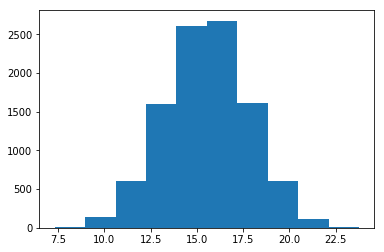

In [12]:
plt.hist(diffs);

In [13]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

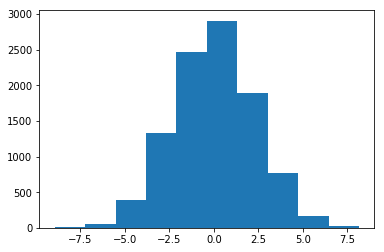

In [14]:
plt.hist(null_vals);

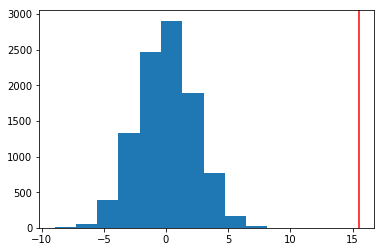

In [15]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [16]:
# compute p-value
(null_vals > obs_diff).mean()

0.0